In [1]:
# 🧠 ASSIGNMENT 5: Continuous Bag of Words (CBOW) Model
# ===============================================================

# 🔹 Step 1: Import necessary libraries
import numpy as np
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda
import tensorflow as tf
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
!pip install tensorflow numpy seaborn scikit-learn matplotlib


In [4]:
# 🔹 Step 2: Prepare and clean the dataset (create a small paragraph)
# ---------------------------------------------------------------
data = """
Deep learning (also known as deep structured learning) is part of a broader family 
of machine learning methods based on artificial neural networks with representation learning.
Learning can be supervised, semi-supervised or unsupervised.
Deep-learning architectures such as deep neural networks, deep belief networks, 
deep reinforcement learning, recurrent neural networks, convolutional neural networks, 
and Transformers have been applied to fields including computer vision, speech recognition, 
natural language processing, machine translation, bioinformatics, drug design, 
medical image analysis, climate science, material inspection and board game programs, 
where they have produced results comparable to and in some cases surpassing human expert performance.
"""

# Split text into sentences
sentences = data.split('.')

# Clean sentences: remove symbols, convert to lowercase
clean_sent = []
for sentence in sentences:
    if sentence.strip() == "":
        continue
    sentence = re.sub('[^A-Za-z0-9]+', ' ', sentence)   # remove special characters
    sentence = sentence.lower().strip()
    clean_sent.append(sentence)

print("🧹 Cleaned Sentences:\n", clean_sent, "\n")


🧹 Cleaned Sentences:
 ['deep learning also known as deep structured learning is part of a broader family of machine learning methods based on artificial neural networks with representation learning', 'learning can be supervised semi supervised or unsupervised', 'deep learning architectures such as deep neural networks deep belief networks deep reinforcement learning recurrent neural networks convolutional neural networks and transformers have been applied to fields including computer vision speech recognition natural language processing machine translation bioinformatics drug design medical image analysis climate science material inspection and board game programs where they have produced results comparable to and in some cases surpassing human expert performance'] 



In [5]:
# 🔹 Step 3: Tokenize the words
# ---------------------------------------------------------------
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_sent)
sequences = tokenizer.texts_to_sequences(clean_sent)

print("🔢 Tokenized Sequences:\n", sequences, "\n")

# Create word index dictionaries
index_to_word = {}
word_to_index = {}
for i, seq in enumerate(sequences):
    words = clean_sent[i].split()
    for j, val in enumerate(seq):
        index_to_word[val] = words[j]
        word_to_index[words[j]] = val

print("🗂 Word to Index Mapping:\n", word_to_index, "\n")


🔢 Tokenized Sequences:
 [[2, 1, 12, 13, 6, 2, 14, 1, 15, 16, 7, 17, 18, 19, 7, 8, 1, 20, 21, 22, 23, 4, 3, 24, 25, 1], [1, 26, 27, 9, 28, 9, 29, 30], [2, 1, 31, 32, 6, 2, 4, 3, 2, 33, 3, 2, 34, 1, 35, 4, 3, 36, 4, 3, 5, 37, 10, 38, 39, 11, 40, 41, 42, 43, 44, 45, 46, 47, 48, 8, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 5, 60, 61, 62, 63, 64, 10, 65, 66, 67, 11, 5, 68, 69, 70, 71, 72, 73, 74]] 

🗂 Word to Index Mapping:
 {'deep': 2, 'learning': 1, 'also': 12, 'known': 13, 'as': 6, 'structured': 14, 'is': 15, 'part': 16, 'of': 7, 'a': 17, 'broader': 18, 'family': 19, 'machine': 8, 'methods': 20, 'based': 21, 'on': 22, 'artificial': 23, 'neural': 4, 'networks': 3, 'with': 24, 'representation': 25, 'can': 26, 'be': 27, 'supervised': 9, 'semi': 28, 'or': 29, 'unsupervised': 30, 'architectures': 31, 'such': 32, 'belief': 33, 'reinforcement': 34, 'recurrent': 35, 'convolutional': 36, 'and': 5, 'transformers': 37, 'have': 10, 'been': 38, 'applied': 39, 'to': 11, 'fields': 40, 'including': 41

In [6]:
# 🔹 Step 4: Generate context-target word pairs for CBOW
# ---------------------------------------------------------------
context_size = 2  # window size on each side
contexts = []
targets = []

for seq in sequences:
    for i in range(context_size, len(seq) - context_size):
        target = seq[i]
        context = [seq[i - 2], seq[i - 1], seq[i + 1], seq[i + 2]]
        contexts.append(context)
        targets.append(target)

print("✅ Example Context-Target pairs:")
for i in range(5):
    words = [index_to_word.get(w) for w in contexts[i]]
    target_word = index_to_word.get(targets[i])
    print(f"{words}  →  {target_word}")

# Convert to numpy arrays
X = np.array(contexts)
Y = np.array(targets)

✅ Example Context-Target pairs:
['deep', 'learning', 'known', 'as']  →  also
['learning', 'also', 'as', 'deep']  →  known
['also', 'known', 'deep', 'structured']  →  as
['known', 'as', 'structured', 'learning']  →  deep
['as', 'deep', 'learning', 'is']  →  structured


In [7]:
# 🔹 Step 5: Build the CBOW Neural Network
# ---------------------------------------------------------------
vocab_size = len(tokenizer.word_index) + 1  # total vocabulary size
embedding_size = 10                         # dimension of embedding vector

# CBOW architecture
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=4),
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),  # average context embeddings
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(vocab_size, activation='softmax')
])

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 🔹 Step 6: Train the Model
# ---------------------------------------------------------------
history = model.fit(X, Y, epochs=80, verbose=1)


Epoch 1/80

3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - accuracy: 0.0114 - loss: 4.3178   
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.0909 - loss: 4.3099 
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.1136 - loss: 4.3023 
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.1136 - loss: 4.2921 
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.1023 - loss: 4.2768 
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.1023 - loss: 4.2588
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.1136 - loss: 4.2293 
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.1136 - loss: 4.1952 
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.1136 - loss: 4.1494 
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.1136 - loss: 4.0896
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.1136 - loss: 4.0307
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.1023 - lo

C:\Users\dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


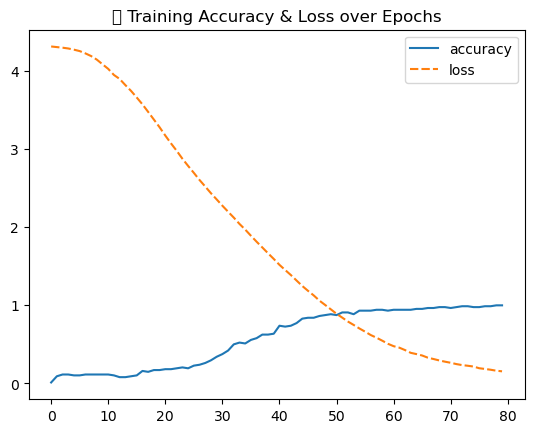

In [9]:
# ---------------------------------------------------------------
# 🔹 Step 7: Visualize training progress
# ---------------------------------------------------------------
sns.lineplot(data=history.history)
plt.title("📈 Training Accuracy & Loss over Epochs")
plt.show()

In [10]:
# 🔹 Step 8: Test the trained model
# ---------------------------------------------------------------
test_sentences = [
    "known as structured learning",
    "transformers have applied to",
    "where they produced results",
    "cases surpassing expert performance"
]

for sent in test_sentences:
    words = sent.split()
    x_test = np.array([[word_to_index.get(w, 0) for w in words]])  # handle unseen words with 0
    pred = model.predict(x_test)
    pred_word = index_to_word.get(np.argmax(pred[0]), "unknown")
    print(f"\n🔮 Input: {words} \n→ Predicted Target Word: {pred_word}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

🔮 Input: ['known', 'as', 'structured', 'learning'] 
→ Predicted Target Word: deep
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step

🔮 Input: ['transformers', 'have', 'applied', 'to'] 
→ Predicted Target Word: been
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step

🔮 Input: ['where', 'they', 'produced', 'results'] 
→ Predicted Target Word: have
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step

🔮 Input: ['cases', 'surpassing', 'expert', 'performance'] 
→ Predicted Target Word: human


C:\Users\dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


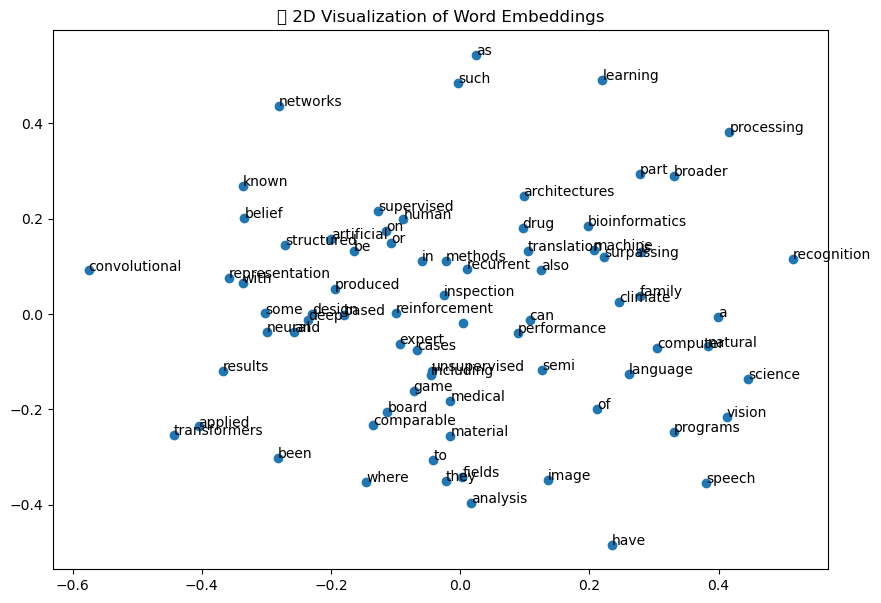

In [11]:
# 🔹 Step 9: Visualize word embeddings (optional)
# ---------------------------------------------------------------
embeddings = model.get_weights()[0]
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 7))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])

for word, i in word_to_index.items():
    plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
plt.title("🧩 2D Visualization of Word Embeddings")
plt.show()